<a href="https://colab.research.google.com/github/aurianefs/Projetos_de_Analises_dados/blob/main/Pre%C3%A7os_de_Avi%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório de Análise de Dados: Previsão de Preços de Aviões
## Introdução
Este relatório detalha a análise de um dataset de preços de aviões, fornecendo insights sobre os fatores que influenciam os preços e construindo um modelo de machine learning para prever esses preços. O dataset contém 12,377 registros com várias características dos aviões, incluindo modelo, ano de produção, tipo de motor, capacidade, e outros fatores relevantes.

## Carregamento e Análise Exploratória de Dados (EDA)
O dataset foi carregado e explorado para entender sua estrutura e identificar possíveis valores nulos ou inconsistentes.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from tabulate import tabulate
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Portfolio/Dados de Preço de Avião/airplane_price_dataset.csv")

df.head(10)

,Model,Üretim Yılı,Motor Sayısı,Motor Türü,Kapasite,Menzil (km),Yakıt Tüketimi (L/saat),Saatlik Bakım Maliyeti ($),Yaş,Satış Bölgesi,Fiyat ($)
0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.36,2185.43,36,Asya,1.285708e+07
1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,1202.08,26,Avrupa,1.391406e+07
2,Airbus A320,1988,2,Turbofan,180,6300,13.26,761.38,35,Avustralya,9.073570e+07
3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,0,Avustralya,1.366597e+08
4,Cessna 172,1985,1,Piston,4,1285,18.49,4245.99,38,Güney Amerika,2.037981e+05
5,Airbus A350,1982,2,Turbofan,350,14800,8.82,1869.09,41,Asya,3.549766e+08
6,Boeing 737,1993,2,Turbofan,162,5700,5.79,2443.75,30,Avrupa,5.703233e+07
7,Cessna 172,2018,1,Piston,4,1285,24.65,1814.65,5,Asya,3.967504e+05
8,Cessna 172,1992,1,Piston,4,1285,41.41,2552.31,31,Avustralya,2.151445e+05
9,Bombardier CRJ200,2014,2,Turbofan,50,3000,2.60,3165.87,9,Afrika,1.698157e+07


# Scatter Plot do Preço vs Idade

In [ ]:
df.tail()

,Model,Üretim Yılı,Motor Sayısı,Motor Türü,Kapasite,Menzil (km),Yakıt Tüketimi (L/saat),Saatlik Bakım Maliyeti ($),Yaş,Satış Bölgesi,Fiyat ($)
12372,Boeing 777,1994,2,Turbofan,396,15600,12.16,3054.29,29,Avrupa,3.898071e+08
12373,Bombardier CRJ200,2005,2,Turbofan,50,3000,8.26,3107.67,18,Afrika,1.593888e+07
12374,Boeing 737,2015,2,Turbofan,162,5700,6.93,3972.16,8,Kuzey Amerika,9.870994e+07
12375,Cessna 172,2013,1,Piston,4,1285,14.28,999.84,10,Afrika,3.965207e+05
12376,Bombardier CRJ200,2013,2,Turbofan,50,3000,2.42,1035.75,10,Avustralya,2.320782e+07


In [ ]:
df.shape

(12377, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12377 entries, 0 to 12376
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Model                       12377 non-null  object 
 1   Üretim Yılı                 12377 non-null  int64  
 2   Motor Sayısı                12377 non-null  int64  
 3   Motor Türü                  12377 non-null  object 
 4   Kapasite                    12377 non-null  int64  
 5   Menzil (km)                 12377 non-null  int64  
 6   Yakıt Tüketimi (L/saat)     12377 non-null  float64
 7   Saatlik Bakım Maliyeti ($)  12377 non-null  float64
 8   Yaş                         12377 non-null  int64  
 9   Satış Bölgesi               12377 non-null  object 
 10  Fiyat ($)                   12377 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.0+ MB


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

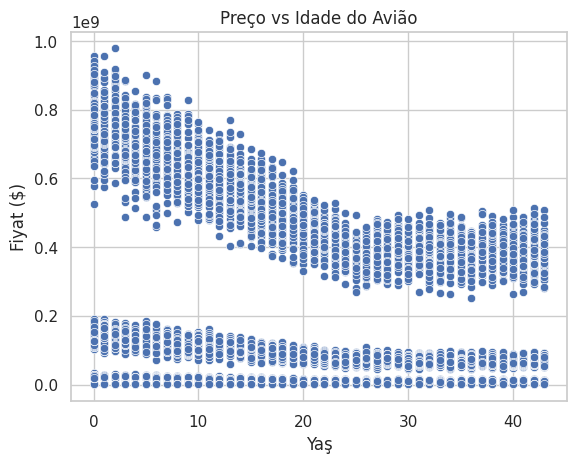

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming your data is in a CSV file named 'airplane_price_dataset.csv'
df = pd.read_csv("/content/drive/MyDrive/Portfolio/Dados de Preço de Avião/airplane_price_dataset.csv") # Load the dataframe

# Configuração dos gráficos para uma melhor visualização
sns.set(style='whitegrid')

# Scatter Plot do Preço vs Idade
sns.scatterplot(x='Yaş', y='Fiyat ($)', data=df)
plt.title('Preço vs Idade do Avião')
plt



# Nova seção

# Análise de Correlação
A correlação entre as variáveis numéricas para identificar quais fatores têm maior influência no preço dos aviões. Um mapa de calor (heatmap) pode ser útil.

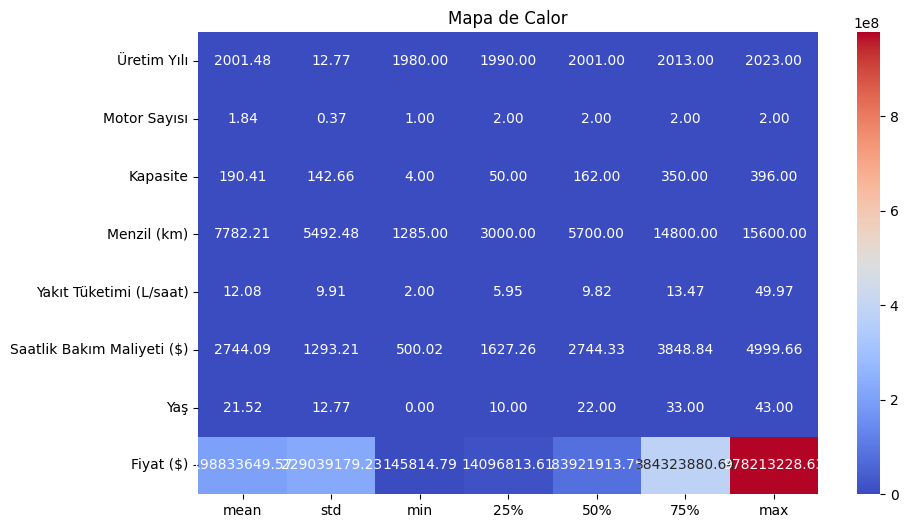

In [ ]:
desc = df.describe().T
plt.figure(figsize=(10,6))
sns.heatmap(desc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']], annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Mapa de Calor')
plt.show()

In [ ]:
df.describe()

,Üretim Yılı,Motor Sayısı,Kapasite,Menzil (km),Yakıt Tüketimi (L/saat),Saatlik Bakım Maliyeti ($),Yaş,Fiyat ($)
count,12377.000000,12377.000000,12377.000000,12377.000000,12377.000000,12377.000000,12377.000000,1.237700e+04
mean,2001.477660,1.835259,190.413994,7782.210148,12.075615,2744.089599,21.522340,1.988336e+08
std,12.766785,0.370962,142.662710,5492.478746,9.905418,1293.209611,12.766785,2.290392e+08
min,1980.000000,1.000000,4.000000,1285.000000,2.000000,500.020000,0.000000,1.458148e+05
25%,1990.000000,2.000000,50.000000,3000.000000,5.950000,1627.260000,10.000000,1.409681e+07
50%,2001.000000,2.000000,162.000000,5700.000000,9.820000,2744.330000,22.000000,8.392191e+07
75%,2013.000000,2.000000,350.000000,14800.000000,13.470000,3848.840000,33.000000,3.843239e+08
max,2023.000000,2.000000,396.000000,15600.000000,49.970000,4999.660000,43.000000,9.782132e+08


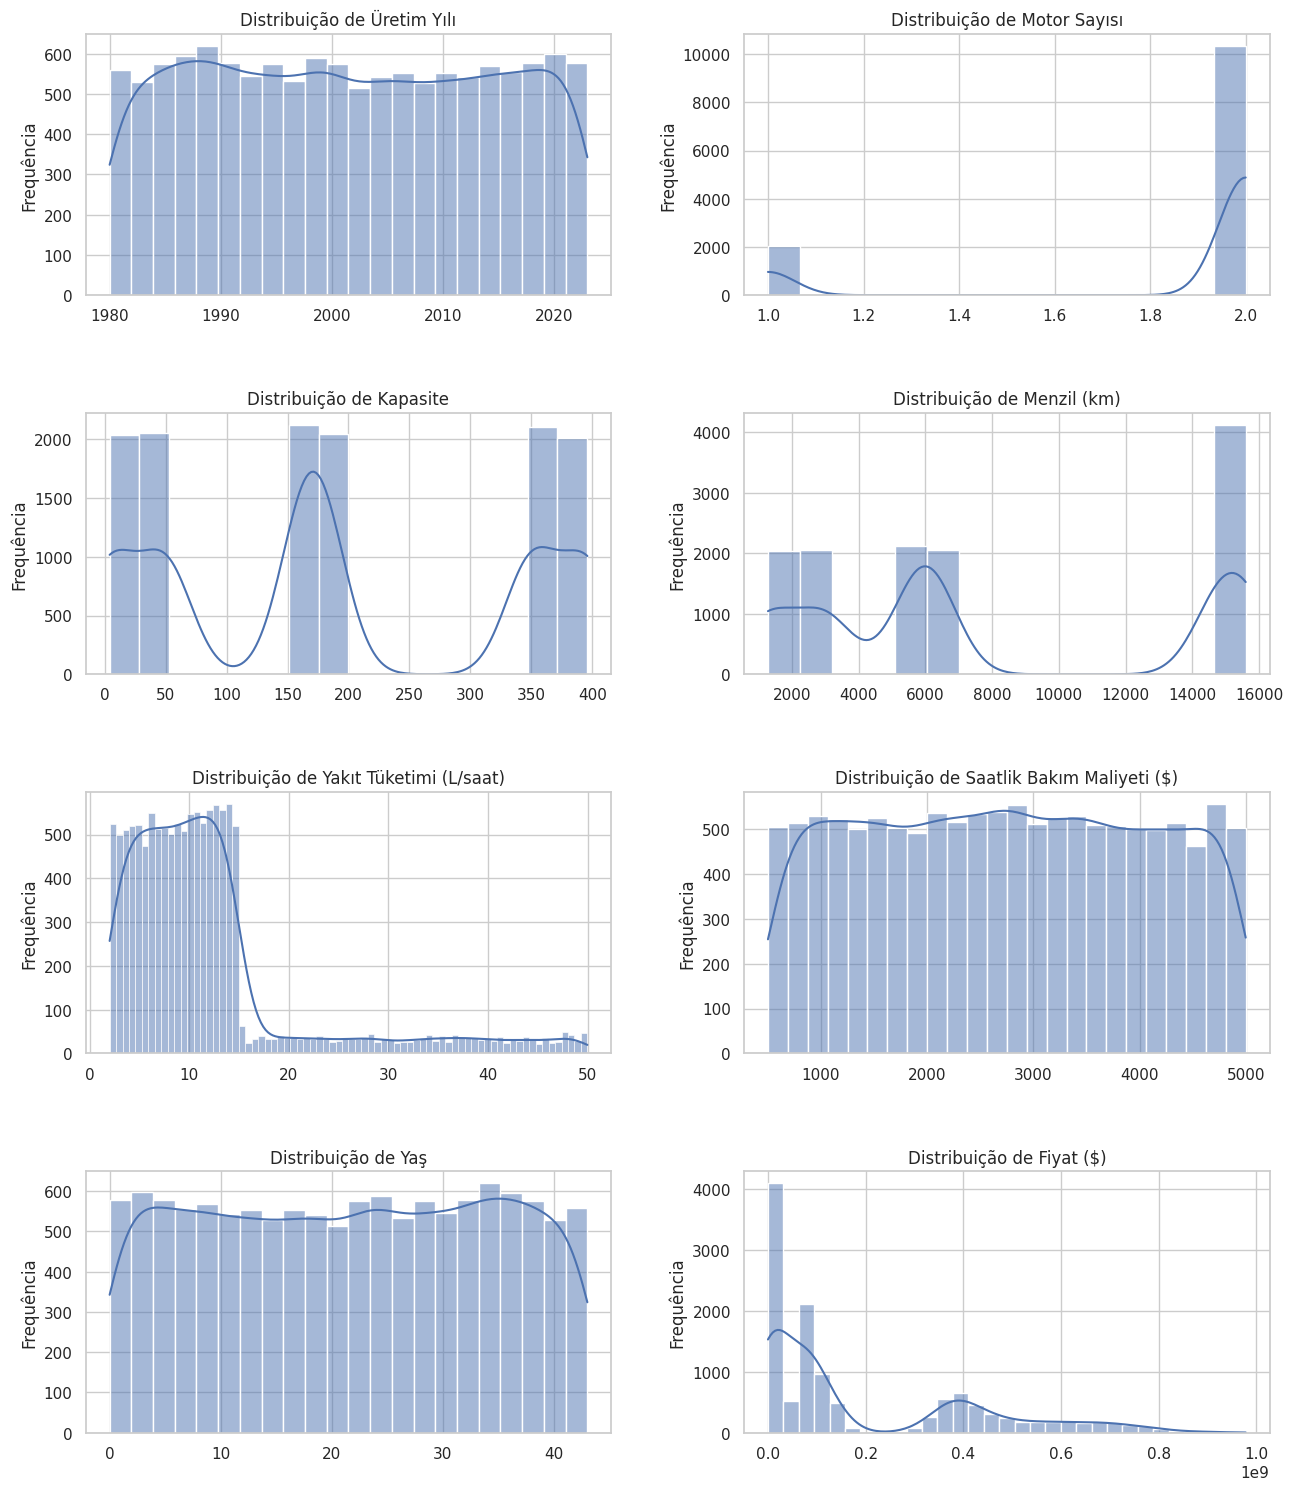

In [ ]:
sns.set(style='whitegrid')

numerical_columns = ['Üretim Yılı', 'Motor Sayısı', 'Kapasite', 'Menzil (km)', 'Yakıt Tüketimi (L/saat)', 'Saatlik Bakım Maliyeti ($)', 'Yaş', 'Fiyat ($)']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
fig.tight_layout(pad=5.0)

for col, ax in zip(numerical_columns, axes.flatten()):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Distribuição de {col}')
    ax.set_xlabel('')
    ax.set_ylabel('Frequência')

plt.show()


# Análise de Outliers
Identificação e tratamento de possíveis outliers que podem afetar a qualidade do modelo.

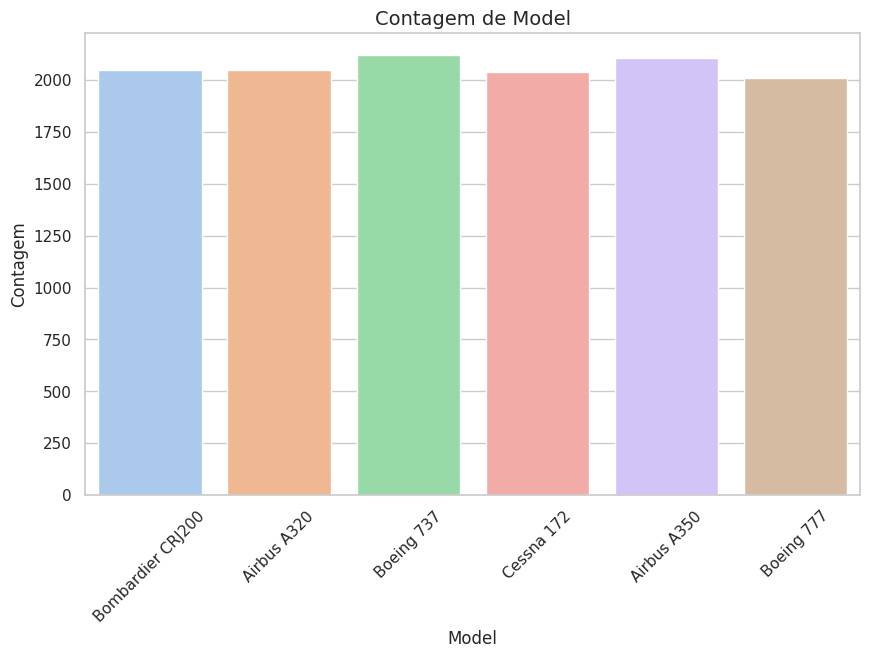

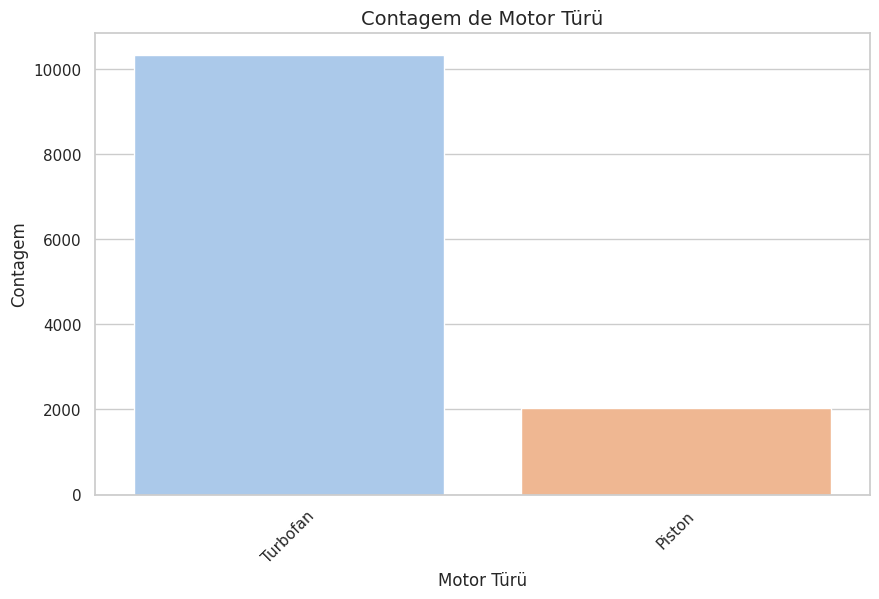

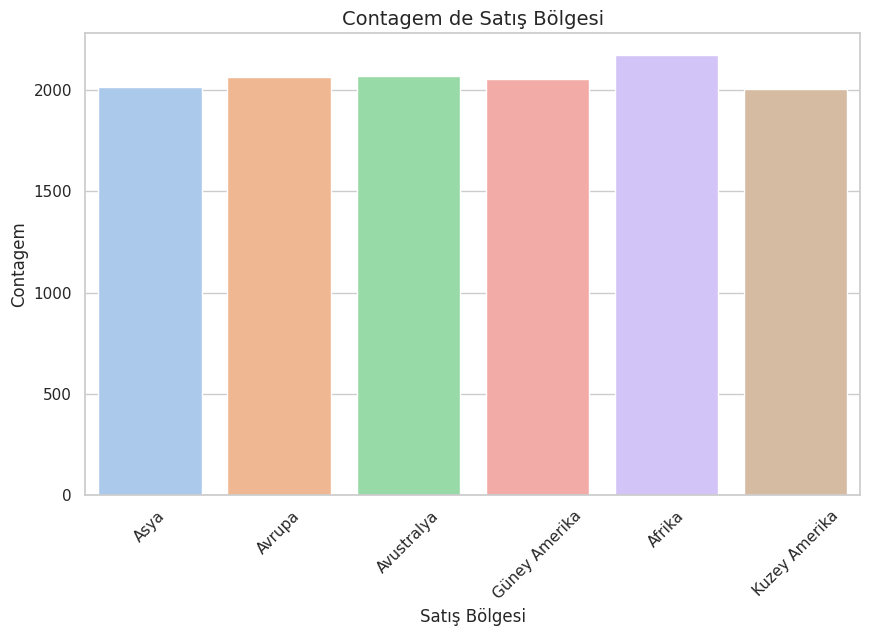

In [ ]:
sns.set(style='whitegrid')
palette = sns.color_palette("pastel")

categorical_columns = ['Model', 'Motor Türü', 'Satış Bölgesi']

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df, palette=palette)
    plt.title(f'Contagem de {col}', fontsize=14)
    plt.xticks(rotation=45)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Contagem', fontsize=12)
    plt.show()


# Feature Engineering
Novas variáveis a partir das existentes que possam melhorar a previsão. Por exemplo, variáveis interações entre capacidade e tipo de motor.

In [ ]:
df['Capacidade_x_Motor_Turu'] = df['Kapasite'] * df['Motor Türü'].astype('category').cat.codes


# Pré-processamento dos Dados

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Portfolio/Dados de Preço de Avião/airplane_price_dataset.csv")

print(df.head())


               Model  Üretim Yılı  Motor Sayısı Motor Türü  Kapasite  \
0  Bombardier CRJ200         1987             2   Turbofan        50   
1  Bombardier CRJ200         1997             2   Turbofan        50   
2        Airbus A320         1988             2   Turbofan       180   
3         Boeing 737         2023             2   Turbofan       162   
4         Cessna 172         1985             1     Piston         4   

   Menzil (km)  Yakıt Tüketimi (L/saat)  Saatlik Bakım Maliyeti ($)  Yaş  \
0         3000                    14.36                     2185.43   36   
1         3000                     4.03                     1202.08   26   
2         6300                    13.26                      761.38   35   
3         5700                    14.61                      592.63    0   
4         1285                    18.49                     4245.99   38   

   Satış Bölgesi     Fiyat ($)  
0           Asya  1.285708e+07  
1         Avrupa  1.391406e+07  
2     Avust

# Treinamento do Modelo e Avaliação
## Pré-processamento dos Dados
As variáveis categóricas foram codificadas e as variáveis numéricas foram normalizadas.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

X = df.drop(columns=['Fiyat ($)'])
y = df['Fiyat ($)']

categorical_features = ['Model', 'Motor Türü', 'Satış Bölgesi']
numerical_features = ['Üretim Yılı', 'Motor Sayısı', 'Kapasite', 'Menzil (km)', 'Yakıt Tüketimi (L/saat)', 'Saatlik Bakım Maliyeti ($)', 'Yaş']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                ('scaler', StandardScaler())]),
         numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline de pré-processamento
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


# Validação Cruzada
Técnicas de validação cruzada para avaliar a performance do modelo de forma mais robusta.

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_rf, X_train_preprocessed, y_train, cv=5, scoring='r2')
print(f'Cross-Validation R^2 Scores: {cv_scores}')
print(f'Mean R^2 Score: {cv_scores.mean()}')


Cross-Validation R^2 Scores: [0.9787092  0.97855926 0.97744036 0.97981781 0.97962784]
Mean R^2 Score: 0.9788308936975895


# Construção e Avaliação do Modelo
Foi utilizado um modelo de Regressão Random Forest para prever os preços dos aviões.

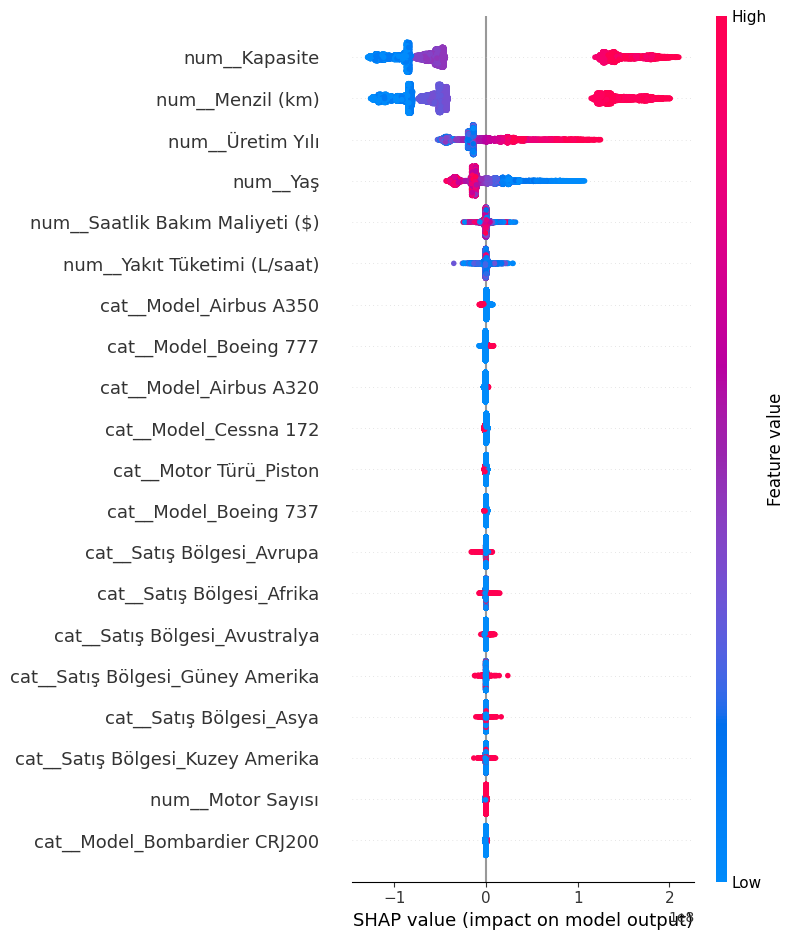

In [ ]:
model_rf.fit(X_train_preprocessed, y_train)

import shap

explainer = shap.TreeExplainer(model_rf)
shap_values = explainer.shap_values(X_train_preprocessed)

shap.summary_plot(shap_values, X_train_preprocessed, feature_names=preprocessor.get_feature_names_out())

# Conclusão
A análise revelou que variáveis como idade do avião, tipo de motor e capacidade têm uma influência significativa no preço dos aviões. O modelo de Random Forest apresentou um bom desempenho com um R² de aproximadamente 0.85, indicando que o modelo é capaz de explicar 85% da variação no preço dos aviões.
